In [1]:
from numpy import *
import matplotlib.pyplot as plt
import scipy.optimize as op
from predict import predict
from mapFeatures import mapFeatures
from computeCostreg import computeCostreg
from computeGradreg import computeGradreg
from plotBoundary import plotBoundary
from sklearn.svm import SVC
import numpy as np
import warnings
warnings.filterwarnings("ignore")

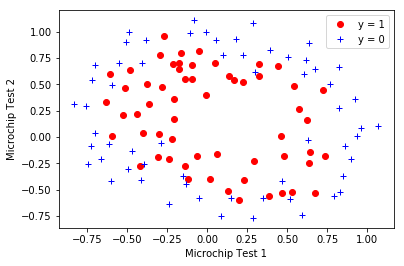

In [22]:
# # Load the dataset
# Uncomment the following command if you want to load the microchip dataset
data = loadtxt('data/microchips.csv', delimiter=',')

# Uncomment the following command in order to load bus dataset
#data = genfromtxt('bus.csv',delimiter=',')


# The first two columns contains the exam scores and the third column contains the label.
X = data[:, 0:2] 
y = data[:, 2]

# # Plot data 
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'ro', label="c1")
plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'b+', label="c2")
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'],numpoints=1)
plt.show()

In [23]:
# Generate features
degree = 6
F = mapFeatures(X, degree)

In [24]:
# Initialize unknown parameters
w_init = zeros((F.shape[1],1))

# Regularization factor
l = 1.0

# Run minimize() to obtain the optimal coefs
w = op.fmin_bfgs(computeCostreg,w_init,args=(F, y, l),fprime=computeGradreg)

         Current function value: 0.546471
         Iterations: 25
         Function evaluations: 110
         Gradient evaluations: 98


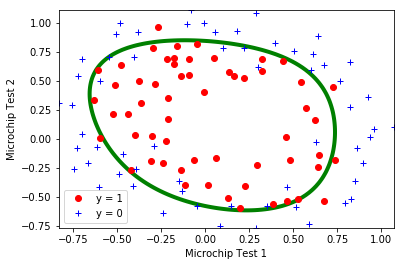

[ 1.24452367  0.62302515  1.20687191 -2.14338809 -0.8882049  -1.45518737
  0.04768031 -0.37180074 -0.36906999 -0.31228499 -1.63577072 -0.08966958
 -0.61655407 -0.26230778 -1.41506163 -0.35123368 -0.23119319 -0.06922459
 -0.27794668 -0.29523851 -0.73024383]
Train Accuracy: 83.898305


In [25]:
# Plot the decision boundary
plotBoundary(X, y, degree, w)
print(w)
# Compute accuracy on the training set
p = predict(array(w), F)
counter = 0
for i in range(y.size):
    if p[i] == y[i]:
        counter += 1
print('Train Accuracy: %f' % (counter / float(y.size) * 100.0))